In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import preprocessing
import scipy as sp
import statsmodels.api as sm
from scipy import stats

In [2]:
df = pd.read_csv('Jointed_ficher_v1.csv')

In [3]:
meteo=df.loc[:,['Temperature','Dew Point','Relative Humidity','Wind Speed','Visibility','WeatherDelay']]
meteo=meteo[meteo['WeatherDelay'] > 0]
#,'Precipitation','Precipitation Cover'

In [4]:
print(df.shape)
print(meteo.shape)
meteo.head()

(1110138, 32)
(78285, 6)


,Temperature,Dew Point,Relative Humidity,Wind Speed,Visibility,WeatherDelay
28,65.0,55.6,71.63,16.1,10.0,233.0
50,31.4,29.5,92.85,12.8,2.2,22.0
127,23.1,10.1,56.99,8.4,10.0,30.0
150,25.1,16.6,69.76,8.2,10.0,3.0
154,18.4,12.4,77.12,3.3,9.6,25.0


In [5]:
X=meteo.iloc[:,:-1].values
y=meteo.iloc[:,5].values
X

array([[65.  , 55.6 , 71.63, 16.1 , 10.  ],
       [31.4 , 29.5 , 92.85, 12.8 ,  2.2 ],
       [23.1 , 10.1 , 56.99,  8.4 , 10.  ],
       ...,
       [71.  , 64.7 , 80.66, 12.3 , 10.  ],
       [60.8 , 57.5 , 89.07,  0.  , 10.  ],
       [68.1 , 67.4 , 97.52, 11.4 , 10.  ]])

In [6]:
def plot_corr(corr):
    # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)

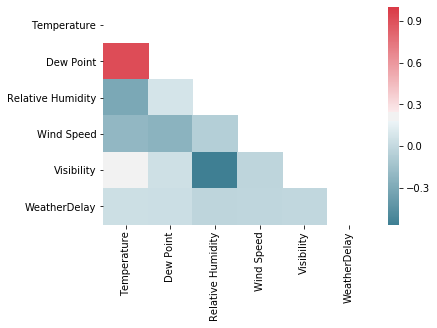

In [7]:
plot_corr(meteo.corr())

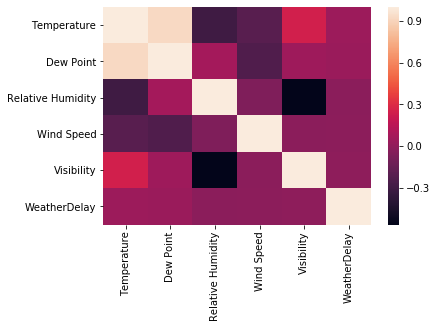

In [8]:
sns.heatmap(meteo.corr())

In [9]:
#La variable Temperature est corrélée à la Dew Point donc nous l'avons supprimée
X=X[:,[0,2,3,4]]
#X

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [11]:
#X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.362
Model:                            OLS   Adj. R-squared (uncentered):              0.362
Method:                 Least Squares   F-statistic:                          1.110e+04
Date:                Wed, 20 Nov 2019   Prob (F-statistic):                        0.00
Time:                        19:10:23   Log-Likelihood:                     -4.2758e+05
No. Observations:               78285   AIC:                                  8.552e+05
Df Residuals:                   78281   BIC:                                  8.552e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2362      0.008     29.930      0.000       0.221       0.252
x2             0.2887      0.006     45.777      0.000       0.276       0.301
x3             0.3618      0.031     11.691      0.000       0.301       0.422
x4             0.6123      0.043     14.309      0.000       0.528       0.696
==============================================================================
Omnibus:                    73688.176   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5461426.054
Skew:                           4.387   Prob(JB):                         0.00
Kurtosis:                      42.967   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model.predict()

array([47.98114709, 40.20195633, 31.07230492, ..., 50.63056244,
       46.19949549, 54.48782553])

In [13]:
mod = sm.RecursiveLS(y,X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                78285
Model:                    RecursiveLS   Log Likelihood             -427600.773
Date:                Wed, 20 Nov 2019   R-squared:                       0.362
Time:                        19:10:26   AIC                         855209.546
Sample:                             0   BIC                         855246.618
                              - 78285   HQIC                        855220.922
Covariance Type:            nonrobust   Scale                         3248.445
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2362      0.008     29.930      0.000       0.221       0.252
x2             0.2887      0.006     45.777      0.000       0.276       0.301
x3             0.3618      0.031     11.691      0.000       0.301       0.422
x4             0.6123      0.043     14.309      0.000       0.528       0.696
===================================================================================
Ljung-Box (Q):                    20368.23   Jarque-Bera (JB):           5429635.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             4.38
Prob(H) (two-sided):                  0.02   Kurtosis:                        42.85
===================================================================================

Warnings:
[1] Parameters and covariance matrix estimates are RLS estimates conditional on the entire sample.
"""